In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.special import expit
rcParams['figure.figsize'] = 20, 12

In [0]:
op_cases = 10
train_df = pd.read_csv("TrainData.csv")
data_t = train_df.to_numpy()
x_train = data_t[:,1:29]
y_train = data_t[:,29:39]

val_df = pd.read_csv("ValData.csv")
data_v = val_df.to_numpy()
x_val = data_v[:,1:29]
y_val = data_v[:,29:39]

test_df = pd.read_csv("TestData.csv")
data_te = test_df.to_numpy()
x_test = data_te[:,1:29]
y_test = data_te[:,29:39]

In [0]:
def sigmoidGrad(z):
    return expit(z)*(1-expit(z))

In [0]:
# cost function for 2 hidden layer Neural Network
def cost_function_NN2(theta,hl1Size,hl2Size,numLabel,X,y,lam=0):
    m= X.shape[0]
    ipSize = X.shape[1]
    J=0

    t1 = theta[0:hl1Size*(ipSize +1)].reshape(hl1Size,ipSize+1)
    t2 = theta[hl1Size*(ipSize +1) : (hl1Size*(ipSize +1)) + (hl2Size*(hl1Size +1))].reshape(hl2Size,hl1Size+1)
    t3 = theta[(hl1Size*(ipSize +1)) + (hl2Size*(hl1Size +1)) : (hl1Size*(ipSize +1)) + (hl2Size*(hl1Size +1)) + numLabel*(hl2Size+1)].reshape(numLabel,hl2Size+1)
    tGrad1 = np.zeros(t1.shape)
    tGrad2 = np.zeros(t2.shape)
    tGrad3 = np.zeros(t3.shape)
    #print(X.shape,t1.shape)
    # Forward propogation algorithm
    z2 = np.append(np.ones((m,1)),X,axis =1).dot(t1.T)
    a2 = expit(z2)
    z3 = np.append(np.ones((m,1)),a2,axis=1).dot(t2.T)
    a3 = expit(z3)
    z4 = np.append(np.ones((m,1)),a3,axis=1).dot(t3.T)
    a4 = expit(z4)
    h = a4
    
    J = (-1/m)*np.sum( y*np.log(h + 1e-20) + (1-y)*np.log(1-h + 1e-20)) 
    #Reg = 
    
    # Back propogation algorithm
    D3=np.zeros(t3.shape)
    D2=np.zeros(t2.shape)
    D1=np.zeros(t1.shape)
    err4 = h - y
    #print(err4)
    l = t3.shape[1]
    err3 = (err4.dot(t3[:,1:l])) * sigmoidGrad(z3)
    #print(err3)
    l = t2.shape[1]
    err2 = (err3.dot(t2[:,1:l])) * sigmoidGrad(z2) 
    #print(err2)
    for i in range(m):
        D3 = D3 + (err4[i:i+1,:].T).dot(np.append(np.ones((1,1)),a3[i:i+1,:],axis=1))
        D2 = D2 + (err3[i:i+1,:].T).dot(np.append(np.ones((1,1)),a2[i:i+1,:],axis=1))
        D1 = D1 + (err2[i:i+1,:].T).dot(np.append(np.ones((1,1)),X[i:i+1,:],axis=1))
    tGrad1 = D1/m
    #tGrad1[:,1:tGrad1.shape[1]] = tGrad1[:,1:tGrad1.shape[1]] + lam/m*t1[:,1:t1.shape[1]]
    tGrad2 = D2/m
    #tGrad2[:,1:tGrad2.shape[1]] = tGrad2[:,1:tGrad2.shape[1]] + lam/m*t2[:,1:t2.shape[1]]
    tGrad3= D3/m
    #print(tGrad1, tGrad2)
    grad = np.concatenate([tGrad1.flat, tGrad2.flat, tGrad3.flat])
    
    #print(grad.shape)
    return [J,grad,h]

In [0]:
def gradient_descent_NN2(X,y,theta,lam,max_itr,alpha,hl1Size,hl2Size): # without regularisation !
    m=X.shape[0]
    J_hist=np.zeros((max_itr,1))
    
    numLabel = y.shape[1]
    for i in range(max_itr):
        [J,grad,h]=cost_function_NN2(theta, hl1Size,hl2Size, numLabel, X, y, lam)
        if i%1000==0:
          print(i)
        theta = theta - (alpha)*(grad) 
        J_hist[i]=J
    return [theta,J_hist]

In [0]:
def gradient_check_NN2(theta,hl1Size,hl2Size,numLabel,X,y):
    #m= X.shape[0]
    #ipSize = X.shape[1]
    appGrad = np.zeros(theta.shape)

    #t1 = theta[0:hlSize*(ipSize +1)].reshape(hlSize,ipSize+1)
    #t2 = theta[hlSize*(ipSize +1) : (hlSize*(ipSize +1)) + (numLabel*(hlSize +1))+1].reshape(numLabel,hlSize+1)

    #tGrad1 = np.zeros(t1.shape)
    #tGrad2 = np.zeros(t2.shape)
    epsilon =.0001
    
    for i in range(theta.shape[0]):
        posTheta = theta
        posTheta[i:i+1] = posTheta[i:i+1] + epsilon
        posJ,gr,h = cost_function_NN2(posTheta, hl1Size,hl2Size, numLabel, X, y)
        negTheta = theta
        negTheta[i:i+1] = negTheta[i:i+1] - epsilon
        negJ,gr,h = cost_function_NN2(negTheta, hl1Size,hl2Size, numLabel, X, y)
        appGrad[i]=((posJ-negJ)/(2*epsilon))
        
    print(posJ,negJ)
    return appGrad

In [0]:
def prediction(h,y):
    
    count =0
    h_out = np.zeros(h.shape)
    
    for i in range(h.shape[0]):
        if h.shape[1] == 1:
            if h[i] >= 0.5:
                h_out[i] = 1
        else:
            h_out[i, np.argmax(h[i,:])] =1
    
    
    for i in range(h.shape[0]):
        for j in range(h.shape[1]):
            if h_out[i,j]!=y[i,j]:
                count = count+1
                break
    acc = (h.shape[0] - count)/h.shape[0] *100
    return [h_out, acc]

In [0]:
ipSize = x_train.shape[1]
hl1Size = 17#1* x_train.shape[1]
hl2Size = 13
numLabel = y_train.shape[1]
E0= 0.01
theta1 = np.random.randint(1,10,(hl1Size,ipSize+1))
itheta1 = theta1*2*E0 - E0
theta2 = np.random.randint(1,10,(hl2Size,hl1Size+1))
itheta2 = theta2*2*E0 - E0
theta3 = np.random.randint(1,10,(numLabel,hl2Size+1))
itheta3 = theta3*2*E0 - E0
initial_theta = np.concatenate([itheta1.flat, itheta2.flat, itheta3.flat])

In [0]:
lam =0
alpha =1.7#1.7 3000#2 3800#2.5 6000 #2.6 7500 # 2.7, 9000
max_itr = 35000

In [0]:
J,grad,h = cost_function_NN2(initial_theta, hl1Size,hl2Size, numLabel, x_train, y_train)
#appGrad = gradient_check_NN2(initial_theta, hl1Size,hl2Size, numLabel, x_train, y_train)

#for i in range(grad.shape[0]):
#    print("{}   {}".format(grad[i],appGrad[i]))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000


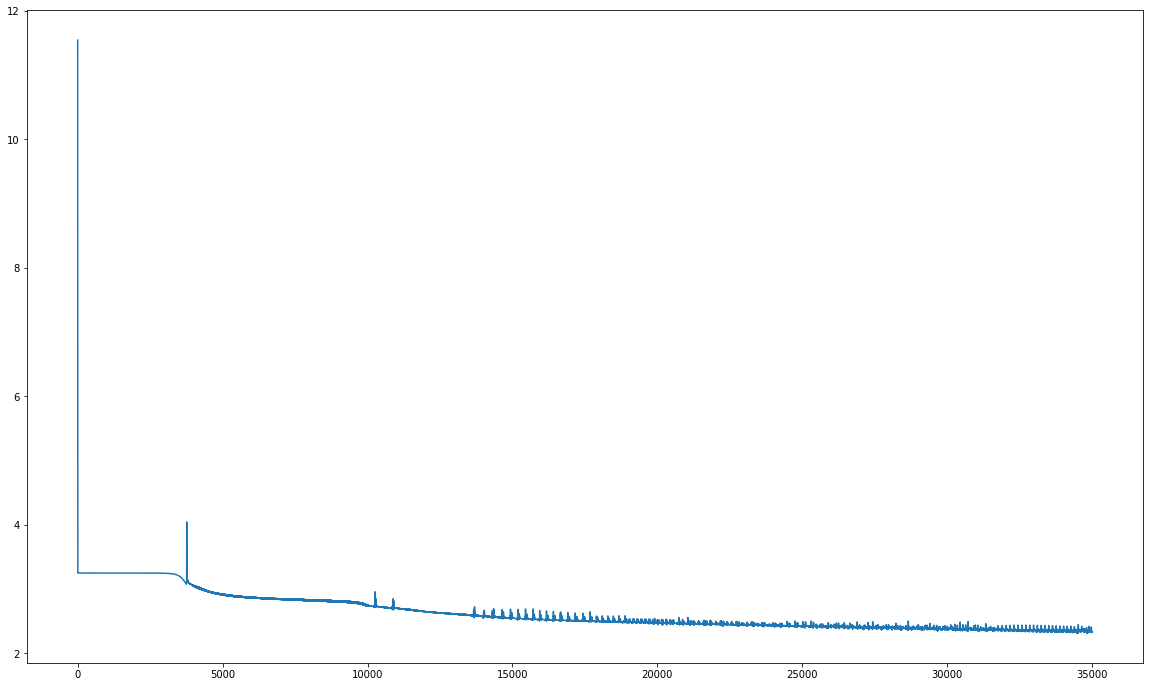

2.3237456891187533

accuracy (train):   41.833333333333336

accuracy:   43.0
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]      [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]      [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]      [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]      [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]      [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] 
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]      [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]      [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]      [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]      [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]      [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]      [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]      [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]      [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 
[0. 0. 0. 0. 

In [104]:
theta,J_hist = gradient_descent_NN2(x_train, y_train, initial_theta, lam, max_itr, alpha, hl1Size, hl2Size)
i=np.arange(1,35001,1) 
plt.plot(i,J_hist)
plt.show()  
print(J_hist[34990,0])
#learning_curve2(hl1Size,hl2Size,numLabel,x_train, x_val, y_train, y_val, theta, lam)

[J,grad,h_train]=cost_function_NN2(theta, hl1Size,hl2Size, numLabel, x_train, y_train)
h_train,acc=prediction(h_train,y_train)
print("\naccuracy (train):  ",acc)

[J,grad,h_test]=cost_function_NN2(theta, hl1Size,hl2Size, numLabel, x_test, y_test)

h_test,acc=prediction(h_test,y_test)
print("\naccuracy:  ",acc)    
for i in range(y_test.shape[0]):
    print( "{}      {} " .format(h_test[i] , y_test[i]))

In [105]:
print(J_hist[34990,0]) #13  2.828....

2.3237456891187533
